In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

# Classifiers

- Hard voting: Predict class which gets most votes, majority-vote
- Soft voting: Predict class with highest probability

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
    voting = 'hard')

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [6]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging and Pasting

- Bagging: Same classifier on different subsets of data, with replacement ------> Bootstrapping
- Pasting: Same classifier on different subsets of data, without replacement

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


# Out of Bag evaluation 
Use the part of training set not used during bagging to perform validation, so cross validation

In [11]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, 
                            oob_score=True)

bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
print(bag_clf.oob_decision_function_)

0.9253333333333333
[[0.30310881 0.69689119]
 [0.37531486 0.62468514]
 [0.99742268 0.00257732]
 [0.01554404 0.98445596]
 [0.02604167 0.97395833]
 [0.09259259 0.90740741]
 [0.43854749 0.56145251]
 [0.05167959 0.94832041]
 [0.95538058 0.04461942]
 [0.82945736 0.17054264]
 [0.59487179 0.40512821]
 [0.04712042 0.95287958]
 [0.71761658 0.28238342]
 [0.86170213 0.13829787]
 [0.91755319 0.08244681]
 [0.08673469 0.91326531]
 [0.02645503 0.97354497]
 [0.90488432 0.09511568]
 [0.71128609 0.28871391]
 [0.93979058 0.06020942]
 [0.05093834 0.94906166]
 [0.26530612 0.73469388]
 [0.90159574 0.09840426]
 [0.97831978 0.02168022]
 [0.94240838 0.05759162]
 [0.00261097 0.99738903]
 [0.94429708 0.05570292]
 [1.         0.        ]
 [0.02295918 0.97704082]
 [0.73506494 0.26493506]
 [0.         1.        ]
 [0.99742268 0.00257732]
 [0.00555556 0.99444444]
 [0.09066667 0.90933333]
 [0.10126582 0.89873418]
 [0.97643979 0.02356021]
 [0.01634877 0.98365123]
 [0.52066116 0.47933884]
 [0.01822917 0.98177083]
 [0.99

# Random Patches and Random subspaces

Can sample features, using the hyperparameters "max_features" and "boostrap_features"

# Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_pred_rf, y_test)

0.912

In [ ]:
# Example of random forests, done by bagging classifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16), 
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

### Extra-trees
Extremely randomized trees: done by using random threshold for each features

### Feature Importance
With random forests, easy to measure relative importance of each feature ------------> Use weighted average of tree node and how they reduce impurity

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.1033218990773931
sepal width (cm) 0.023390098125678115
petal length (cm) 0.45148112901130927
petal width (cm) 0.42180687378561943


In [16]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [17]:
plot_digit(rnd_clf.feature_importances_)

cbar = graph.colorbar(ticks = [rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])

graph.show()

ValueError: cannot reshape array of size 4 into shape (28,28)

# Boosting
Ensemble methods that combine several weak learners into a strong learner

### AdaBoost
- Adaptive Boosting
- Focus on instances that previous predictor underfitted
    - New predictors focusing more on hard cases ----> Obtained by increasing relative weight of misclassified training instances
- Like baggig and pasting. BUT PREDICTORS HAVE DIFFERENT WEIGHTS

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

### Gradient Boosting
- Sequentially add predictors to ensemble, each one correcting predecessor
- Does not tweak instance weights, BUT FIT NEW PREDICTOR TO RESIDUAL ERRORS MADE BY PREVIOUS PREDICTOR

In [30]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.75026781]


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators=120)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(x_val)]
best_n_estimators = np.argmin(errors)

print(best_n_estimators)

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators=best_n_estimators)
gbrt_best.fit(x_train, y_train)

48


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=48,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

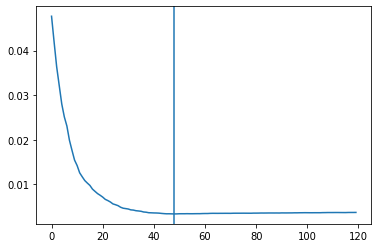

In [46]:
graph.plot(np.arange(len(errors)), errors)
graph.axvline(np.argmin(errors))
graph.show()

In [47]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start= True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [51]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_val)

xgb_reg.fit(x_train, y_train, 
            eval_set=[(x_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(x_val)

[0]	validation_0-rmse:0.27840
[1]	validation_0-rmse:0.21113
[2]	validation_0-rmse:0.15815
[3]	validation_0-rmse:0.12088
[4]	validation_0-rmse:0.09705
[5]	validation_0-rmse:0.08036
[6]	validation_0-rmse:0.07042
[7]	validation_0-rmse:0.06499
[8]	validation_0-rmse:0.06319
[9]	validation_0-rmse:0.06231
[10]	validation_0-rmse:0.06212
[11]	validation_0-rmse:0.06240


# Stacking
- Instead of using functions to aggregate predictions, train a model to do the regression for us!
- THAT MODEL IS CALLED A BLENDER!
- LEARNS TO PREDICT TARGET VALUE GIVEN FIRST LAYER'S PREDICTIONS

# eXERCISES

8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a
validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation,
and 10,000 for testing). Then train various classifiers, such as a Random
Forest classifier, an Extra-Trees classifier, and an SVM. Next, try to combine
them into an ensemble that outperforms them all on the validation set, using a
soft or hard voting classifier. Once you have found one, try it on the test set. How
much better does it perform compared to the individual classifiers?

9. Run the individual classifiers from the previous exercise to make predictions on
the validation set, and create a new training set with the resulting predictions:
each training instance is a vector containing the set of predictions from all your
classifiers for an image, and the target is the image’s class. Train a classifier on
this new training set. Congratulations, you have just trained a blender, and
together with the classifiers they form a stacking ensemble! Now let’s evaluate the
ensemble on the test set. For each image in the test set, make predictions with all
your classifiers, then feed the predictions to the blender to get the ensemble’s predictions.
How does it compare to the voting classifier you trained earlier?